# Titanic Survival Analysis - Exploratory Data Analysis

**Author:** Gurpreet Singh Sawhney
**Date:** 14 October 2025
**Objective:** Analyze factors affecting survival on the Titanic

## Table of Contents
1. Data Loading and Inspection
2. Univariate Analysis
3. Bivariate Analysis
4. Multivariate Analysis
5. Feature Engineering
6. Key Insights

In [1]:
#The Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
df=pd.read_csv('Titanic data set/train.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')



In [3]:
#An overview of the Data Set
print(df.info())
print("\n" + "="*50 + "\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486

In [4]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print("\nData types:")
print(df.dtypes)


Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
#Overall survival rate
print(f"Survival rate: {df['Survived'].mean():.2%}")


Survival rate: 38.38%


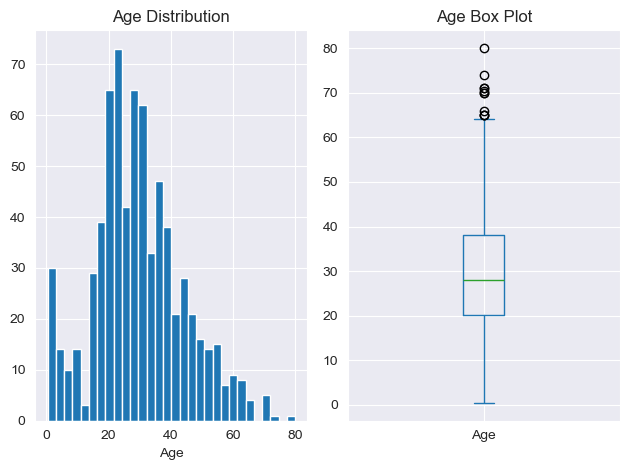

In [7]:
# Age distribution of the passangers
plt.subplot(1, 2, 1)
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
df['Age'].plot(kind='box')
plt.title('Age Box Plot')
plt.tight_layout()
plt.show()


In [8]:
print(f"Min age: {df['Age'].min()}")
print(f"Q1 (25th): {df['Age'].quantile(0.25)}")
print(f"Median: {df['Age'].median()}")
print(f"Q3 (75th): {df['Age'].quantile(0.75)}")
print(f"Max age: {df['Age'].max()}")
print(f"IQR: {df['Age'].quantile(0.75) - df['Age'].quantile(0.25)}")


Min age: 0.42
Q1 (25th): 20.125
Median: 28.0
Q3 (75th): 38.0
Max age: 80.0
IQR: 17.875


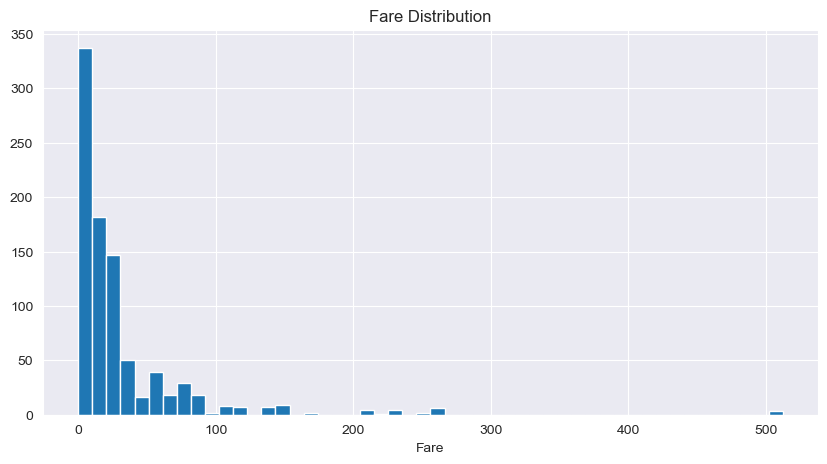

In [9]:
# Fare distribution
plt.figure(figsize=(10, 5))
df['Fare'].hist(bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()


In [10]:
# Categorical variables
print("\nClass distribution:")
print(df['Pclass'].value_counts())

print("\nSex distribution:")
print(df['Sex'].value_counts())



Class distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex distribution:
Sex
male      577
female    314
Name: count, dtype: int64


In [11]:
print("Survival by Gender:")
df.groupby('Sex').Survived.mean()

Survival by Gender:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

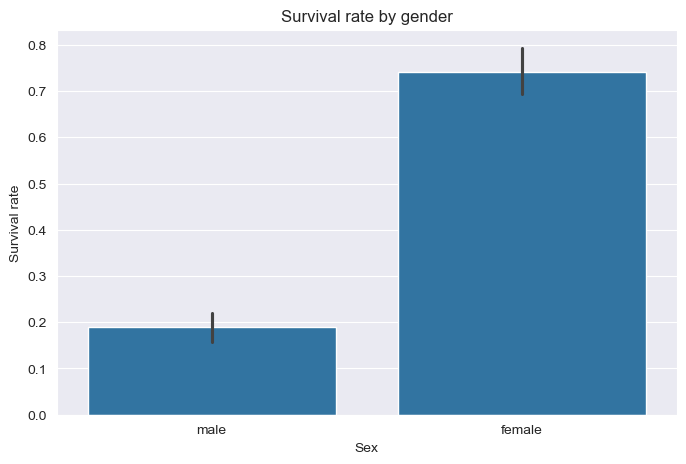

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Sex',y='Survived')
plt.title('Survival rate by gender')
plt.ylabel('Survival rate')
plt.show()

In [13]:
#Survival by class
df.groupby('Pclass').Survived.mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

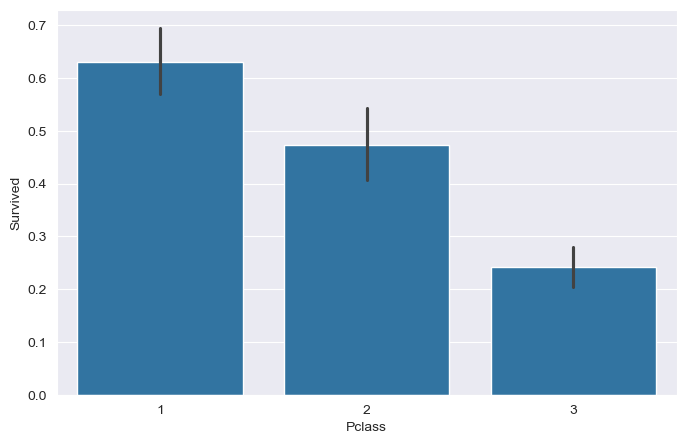

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Pclass', y='Survived')
plt.show()

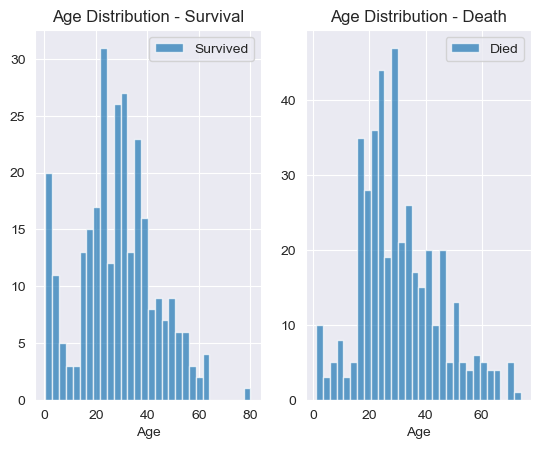

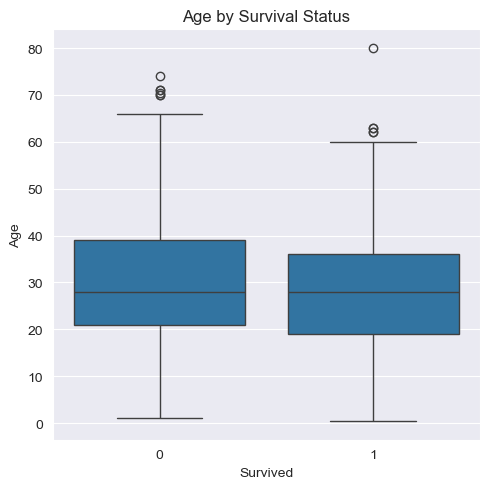

In [15]:
# Age vs Survival
plt.subplot(1, 2, 1)
df[df['Survived']==1]['Age'].hist(bins=30, alpha=0.7, label='Survived')
plt.legend()
plt.title('Age Distribution - Survival')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
df[df['Survived']==0]['Age'].hist(bins=30, alpha=0.7, label='Died')
plt.legend()
plt.title('Age Distribution - Death')
plt.xlabel('Age')

plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Age by Survival Status')
plt.tight_layout()
plt.show()


In [16]:
# Survival by Class AND Gender
survival_by_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print(survival_by_class_sex)


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


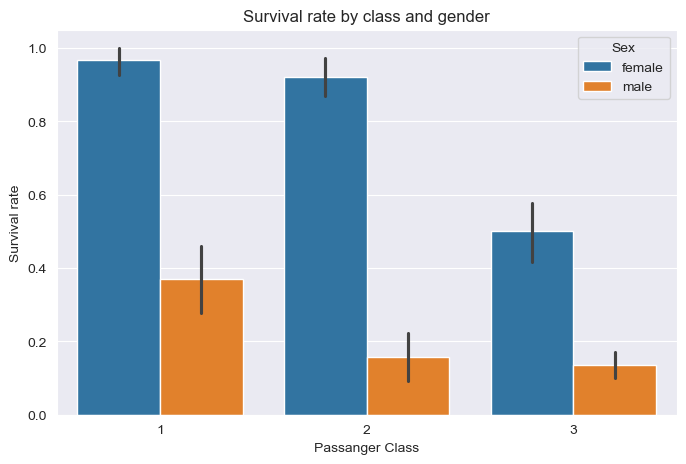

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Pclass', y='Survived', hue='Sex')
plt.title('Survival rate by class and gender')
plt.xlabel('Passanger Class')
plt.ylabel('Survival rate')
plt.show()

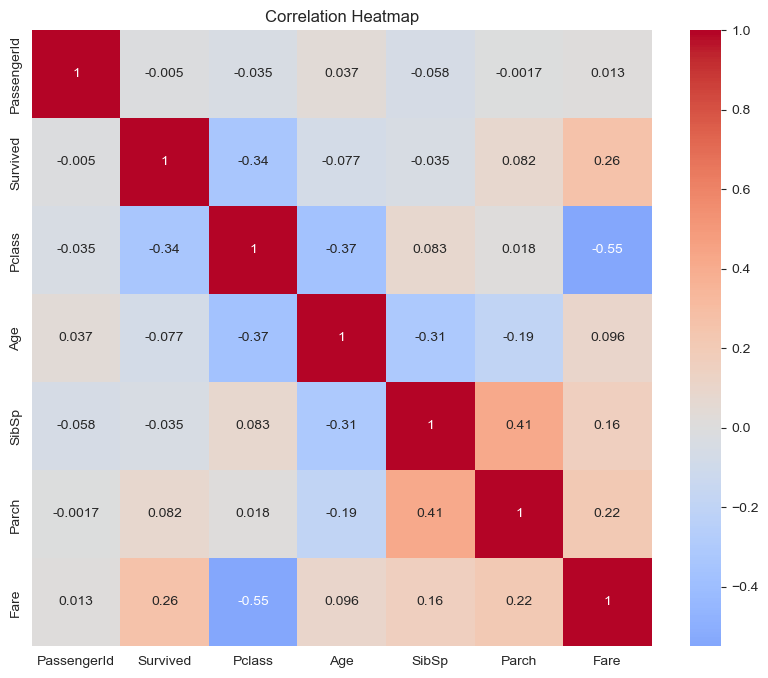

In [18]:
# Correlation heatmap (numerical variables only)
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
#Investigating survival by age group
df['age_group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                          labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

print("Survival by Age Group:")
print(df.groupby('age_group')['Survived'].mean())


Survival by Age Group:
age_group
Child          0.579710
Teen           0.428571
Adult          0.382682
Middle-aged    0.400000
Senior         0.227273
Name: Survived, dtype: float64


In [20]:
#Investigating survival by family size
df['family_size']=df['Parch']+df['SibSp']+1
df.groupby(['family_size']).Survived.mean()

family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

## Key Findings from Titanic EDA

### 1. Survival Rate
- Overall survival rate: 38%
- Strong gender disparity in survival

### 2. Gender Impact
- Women had 74% survival rate
- Men had only 19% survival rate
- "Women and children first" policy clearly visible

### 3. Class Impact
- 1st class: 63% survival
- 2nd class: 47% survival
- 3rd class: 24% survival
- Socioeconomic status was a major factor

### 4. Age Patterns
- Children (<12) had higher survival rates
- No significant difference in adult age groups
- Seniors (>60 years old) had the lowest survival rate (~22%)

### 5. Family Size
- Solo travelers and members of large families had lower survival
- Members of small families (2-4 people) had best survival rates

### 6. Missing Data
- Age: 177 missing values (20%)
- Cabin: 687 missing (77%)
- Embarked: 2 missing
